In [118]:
from pyspark.sql import SparkSession
from typing import Generator, List
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import os 

spark = SparkSession.builder.master("local").appName("year-taxi").getOrCreate()


In [119]:
# directory = [f"{os.getcwd()}/data/{i}" for i in os.listdir(f"{os.getcwd()}/data")]

In [120]:
directory = f"{os.getcwd()}/data"
# trip1: str = "fhvhv_tripdata_2020-01.parquet"


trip_data = spark.read.parquet(f"file:///{directory}/*/*")
trip_data.createTempView("trip_data")

In [121]:
qs = """
SELECT
    *
FROM 
    trip_data
"""
spark.sql(qs).show()

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [127]:
import matplotlib.pyplot as plt 
qs = """
SELECT
    month,
    COUNT(*) as trip
FROM 
    (SELECT split(pickup_datetime, " ")[0] as month FROM trip_data)
GROUP BY
    month
ORDER BY
    month
"""
comc = spark.sql(qs).toPandas()

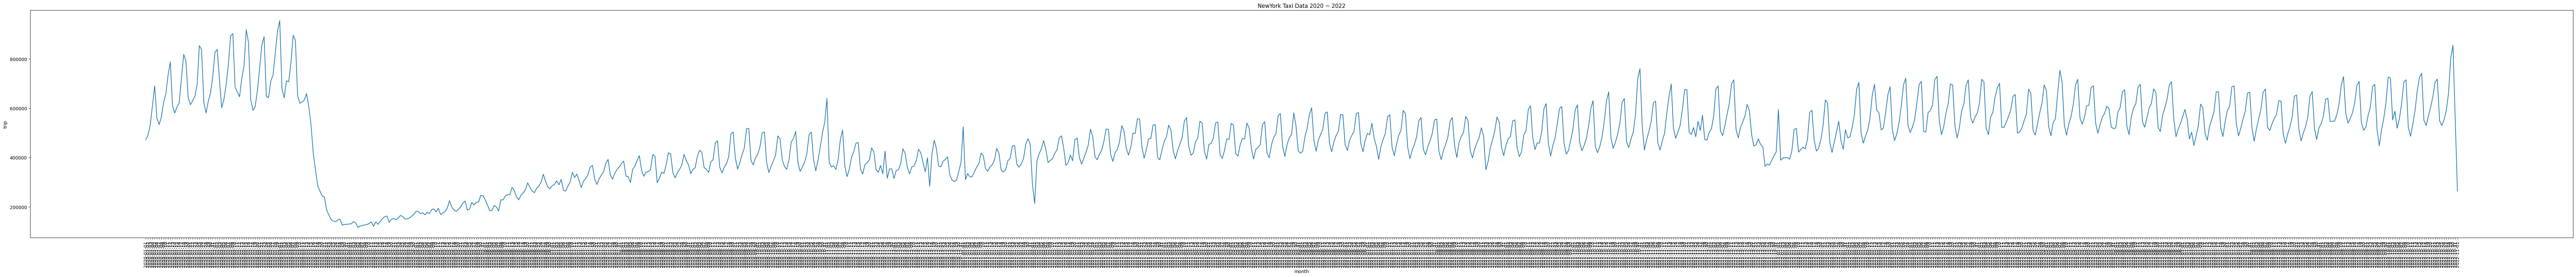

In [129]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(100, 9))
sns.lineplot(x="month", y="trip", data=comc)
plt.xticks(rotation=90)
plt.title("NewYork Taxi Data 2020 ~ 2022")
plt.show()